In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector,make_column_transformer
import scipy.cluster.hierarchy as sch
%matplotlib inline

In [3]:
data = 'heart.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# check missing value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# check duplicated value
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [10]:
ds = df.copy()

In [11]:
# create column selector
nums = make_column_selector(dtype_include='number')
cats = make_column_selector(dtype_include='object')

In [12]:
# instantiate standard scaler
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)


In [13]:
num_tuple = (scaler,nums)
cat_tuple = (ohe,cats)

In [14]:
# create transformer
transformer = make_column_transformer(num_tuple,cat_tuple,remainder='passthrough')


In [15]:
# dataframe
scl = pd.DataFrame(transformer.fit_transform(df))
scl.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-1.113115,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,0.898380,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-1.113115,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,0.898380,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-1.113115,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Text(0.5, 0, 'Data Points')

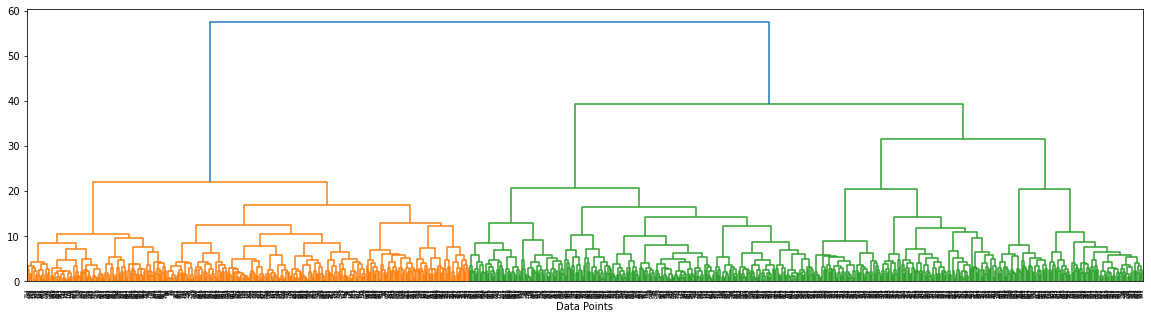

In [16]:
plt.figure(figsize=(20,5))
sch.dendrogram(sch.linkage(scl,method='ward'))
plt.xlabel('Data Points')

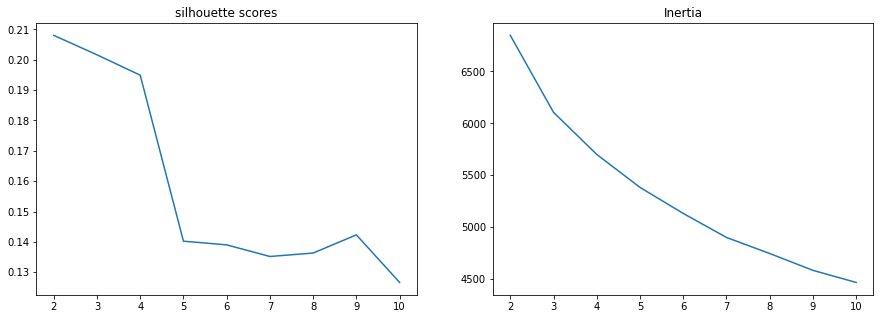

In [17]:

#Create an empty list of inertias
ks = range(2,11)
sils = []
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in ks:  
    kmeans = KMeans(n_clusters=k,random_state=42)  
    kmeans.fit(scl)  
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(scl, kmeans.labels_))
#Visualize scores
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(ks,sils)
axes[0].set_title('silhouette scores')
axes[0].set_xticks(ks)
axes[1].plot(ks,inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [18]:
# Save the cluster labels to the dataframe 
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(scl)

KMeans(n_clusters=2, random_state=42)

In [19]:
# see values
kmeans.labels_

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# add cluster to data frame
df['cluster'] = kmeans.labels_
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cluster
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [21]:
# cluster mean value
cluster_group = df.groupby('cluster',as_index=False).mean()
cluster_group

,cluster,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0,56.905051,135.434343,169.686869,0.351515,124.642424,1.391515,0.937374
1,1,49.539007,128.841608,232.867612,0.094563,151.047281,0.297400,0.104019


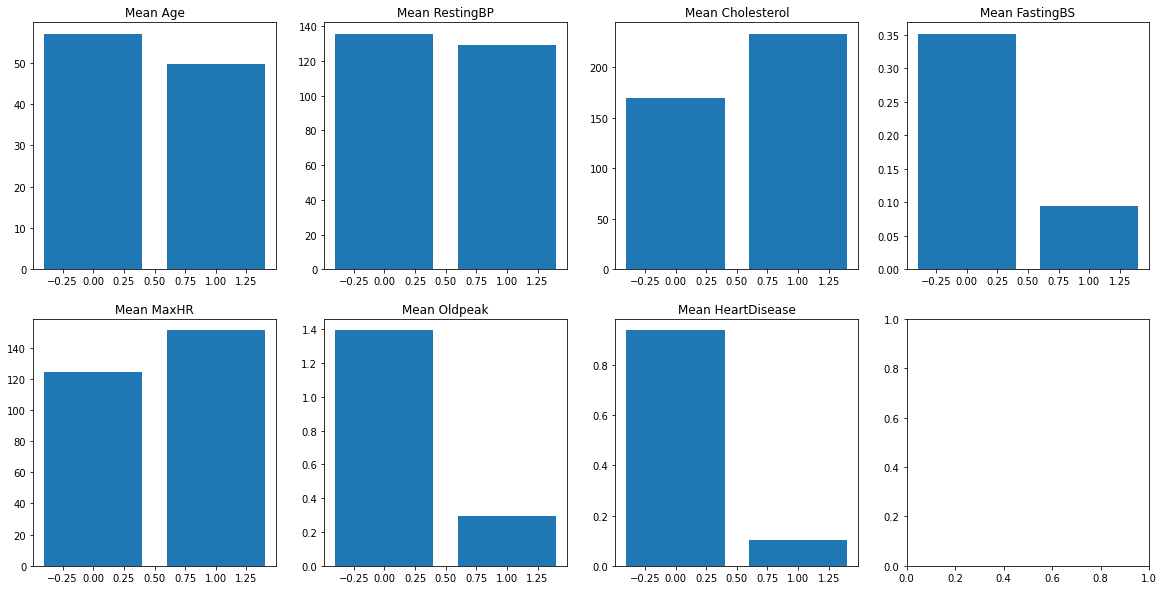

In [22]:
# visualize means
fig , axes = plt.subplots(2,4,figsize=(20,10))
# fig is an array of dimensions 3,4 axes.ravel() will flatten it 12,1
axes = axes.ravel()
# loop over columns and plot each in a seperate figure 
for i,col in enumerate(cluster_group.columns[1:]):
  axes[i].bar(cluster_group['cluster'],cluster_group[col])
  axes[i].set_title(f'Mean {col}')

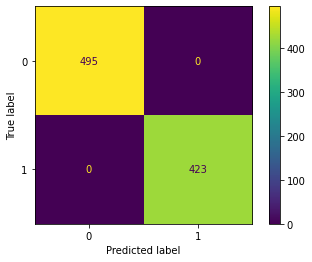

In [23]:
ConfusionMatrixDisplay.from_predictions(df['cluster'], kmeans.labels_)

In [24]:
cluster_gp = df.groupby('cluster',as_index=False)

In [25]:
cluster_gp.describe()

Age                                                    RestingBP  \
   count       mean       std   min   25%   50%   75%   max     count   
0  495.0  56.905051  8.346802  31.0  52.0  58.0  62.0  77.0     495.0   
1  423.0  49.539007  9.080617  28.0  42.5  50.0  55.5  74.0     423.0   

               ... HeartDisease      cluster                                \
         mean  ...          75%  max   count mean  std  min  25%  50%  75%   
0  135.434343  ...          1.0  1.0   495.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  128.841608  ...          0.0  1.0   423.0  1.0  0.0  1.0  1.0  1.0  1.0   

        
   max  
0  0.0  
1  1.0  

[2 rows x 64 columns]

cluster 0 are older than cluster 1. cluster 0 has higher mean rate in RestingBP, FastingBS, Oldpeak, and Heart Diease rate.

cluster 1 are youner group, cluster 1 has higher rate in Cholesterol,MaxHR, and lower rate in Resting BP, Fasting BS,oldpeak and HeartDisease.

We can tell higher Cholesterol and MaxHR heartDiease will have higher chance to get heartDiease